     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

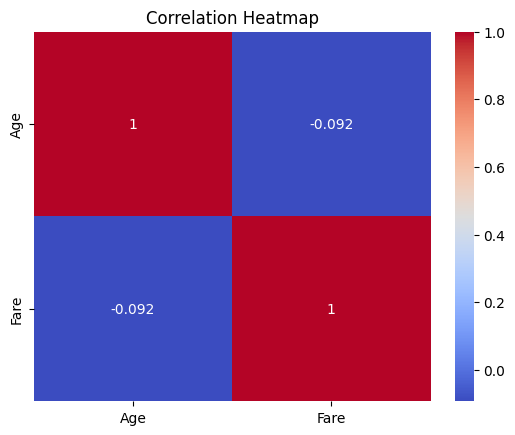

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('c:/Users/Win Technology/Downloads/titanic.csv') #Loaded the data
print(df)
print(df.isnull().values.any()) #Checked for and handled any missing values
print(df.isnull().sum())
print(df[df.isnull().any(axis = 1)])
print(df.isnull().sum().sum())
df = df.dropna()
df = df.fillna(0)  
Q1 = df['Age'].quantile(0.25)  #Identifying and considering treating any outliers in numerical column; using a random column
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(outliers)
print(df.describe()) #Used descriptive statistics
pivot = df.pivot_table(
    values = 'Survived', #Created a pivot line
    index = 'Pclass',
    columns = 'Sex',
    aggfunc = 'mean'
) 
print(pivot) 
numerical_features = df[['Age','Fare']] # exploring correlations between numerical features and visualize with heatmap
correlation_matrix = numerical_features.corr()
print(correlation_matrix) 

sns.heatmap(correlation_matrix, annot = True , cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()